In [1]:
#Nama : Adifa Syahira
#Nim  : 1103202067
#Kelas: TK 44-G4

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.pandas.set_option('display.max_columns',None) 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [2]:
df = pd.read_csv(r"D:\KULIAH DIFA\Semester 7 HUHU\Machine Learning\Minggu 6\Credit Card Customer Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
features = ['Total_visits_bank','Total_visits_online','Total_calls_made']

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


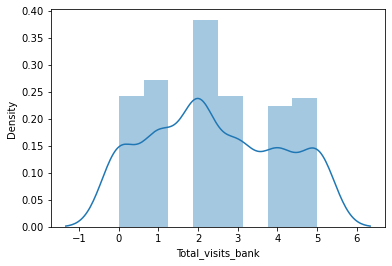

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


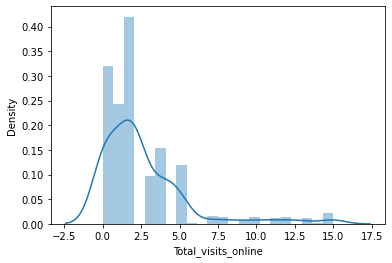

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


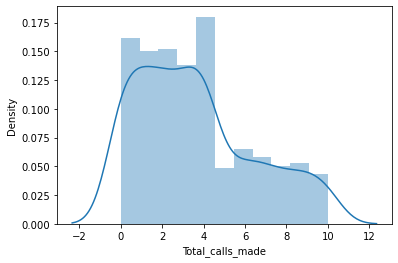

In [5]:
for feature in features:
    sns.distplot(df[feature]) #Checking the distributions of the interactions
    plt.show()

In [6]:
# Mengganti nama kolom
df = df.rename(columns={'Sl_No': 'Number', 'Avg_Credit_Limit': 'Avg Credit Limit', 'Total_Credit_Cards' : 'Total Kartu Kredit' , 'Total_visits_bank':'Total Visit Bank','Total_visits_online' : 'Total Visit Online','Total_calls_made' : 'Total Calls Made'})

# Menampilkan DataFrame yang sudah diubah
print(df)

     Number  Customer Key  Avg Credit Limit  Total Kartu Kredit  \
0         1         87073            100000                   2   
1         2         38414             50000                   3   
2         3         17341             50000                   7   
3         4         40496             30000                   5   
4         5         47437            100000                   6   
..      ...           ...               ...                 ...   
655     656         51108             99000                  10   
656     657         60732             84000                  10   
657     658         53834            145000                   8   
658     659         80655            172000                  10   
659     660         80150            167000                   9   

     Total Visit Bank  Total Visit Online  Total Calls Made  
0                   1                   1                 0  
1                   0                  10                 9  
2        

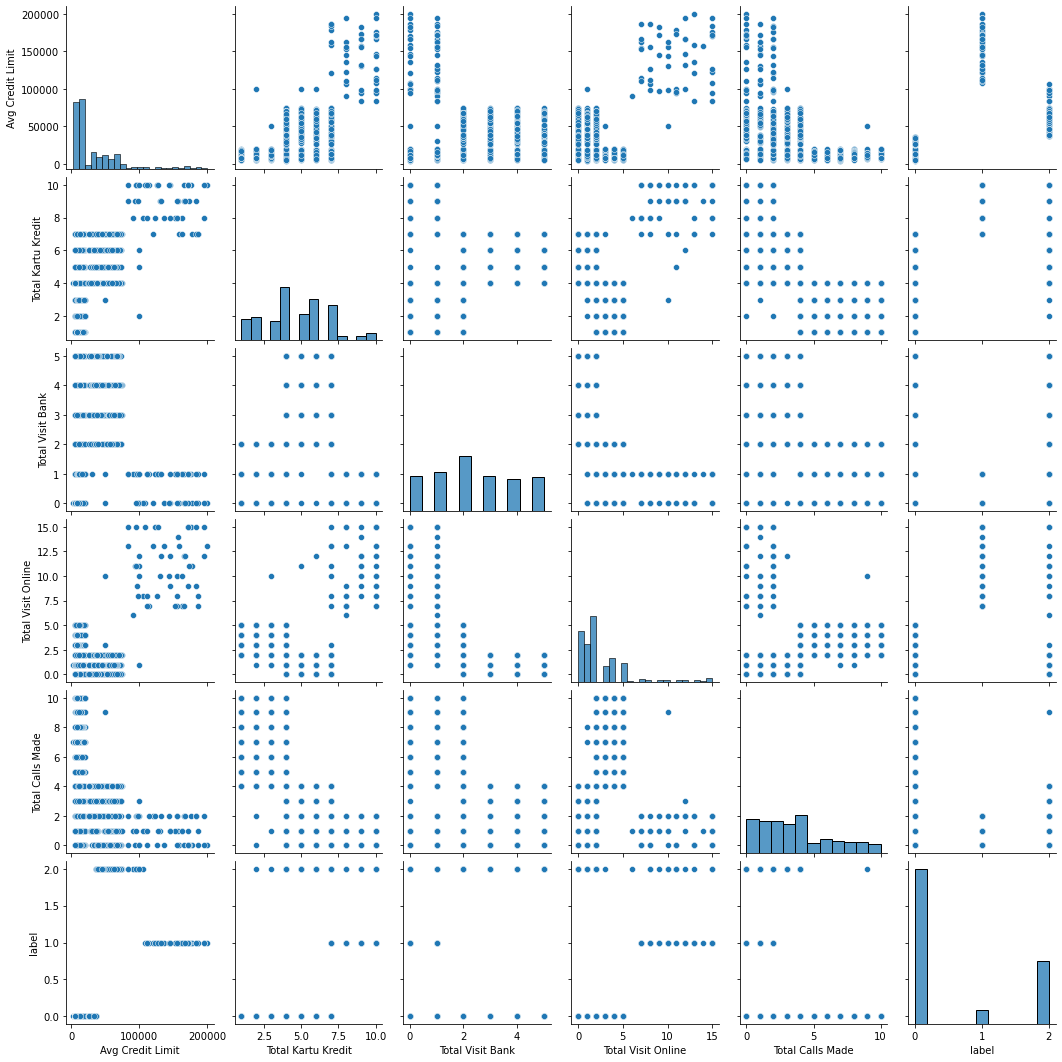

In [31]:
data = df.drop(['Number','Customer Key'],axis=1).copy()
sns.pairplot(data) #Pairplot from seaborn library

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


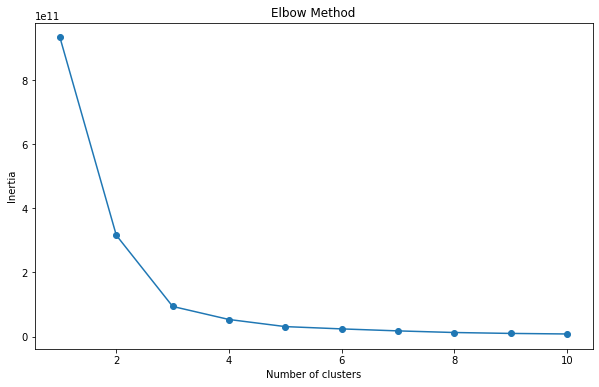

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membuat list kosong untuk menampung nilai inersia
inertia = []

# Mengambil kolom yang diperlukan
X = df[['Avg Credit Limit','Total Kartu Kredit', 'Total Visit Bank','Total Visit Online','Total Calls Made']]

# Melakukan perulangan untuk nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan metode elbow
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

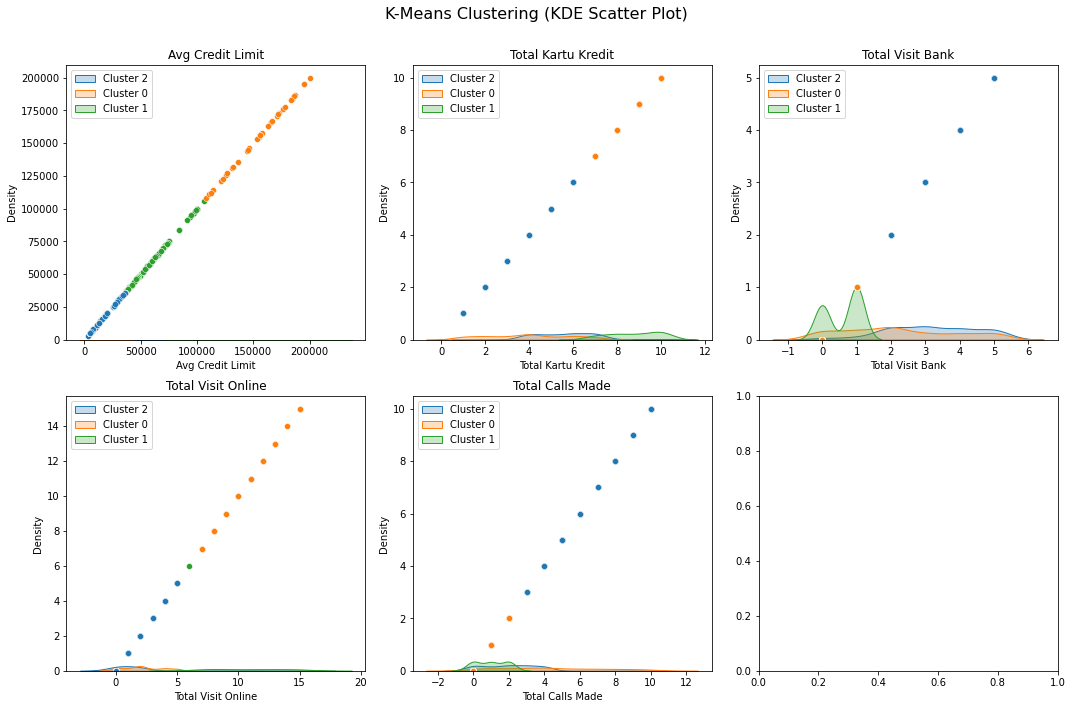

In [17]:
import seaborn as sns

data = df[['Avg Credit Limit', 'Total Kartu Kredit', 'Total Visit Bank', 'Total Visit Online', 'Total Calls Made']]

kmeans = KMeans(n_clusters=3, random_state=0)
df['label'] = kmeans.fit_predict(data)

# Membuat subplots sebanyak kolom
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('K-Means Clustering (KDE Scatter Plot)', fontsize=16)

for i, column in enumerate(data.columns):
    row, col = i // 3, i % 3
    for label in df['label'].unique():
        sns.kdeplot(df[df['label'] == label][column], ax=axes[row, col], label=f'Cluster {label}', fill=True)
        sns.scatterplot(data=df[df['label'] == label], x=column, y=column, ax=axes[row, col], color=f'C{label}')
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel(column)
    axes[row, col].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


For k = 2, Silhouette Score = 0.770112135258687
For k = 3, Silhouette Score = 0.7166257323382714
For k = 4, Silhouette Score = 0.6987312610796789
For k = 5, Silhouette Score = 0.7085077086163358
For k = 6, Silhouette Score = 0.6047211614306177
For k = 7, Silhouette Score = 0.6223014220132757
For k = 8, Silhouette Score = 0.6173604622491632
For k = 9, Silhouette Score = 0.6199038942099759
For k = 10, Silhouette Score = 0.6091202670390838


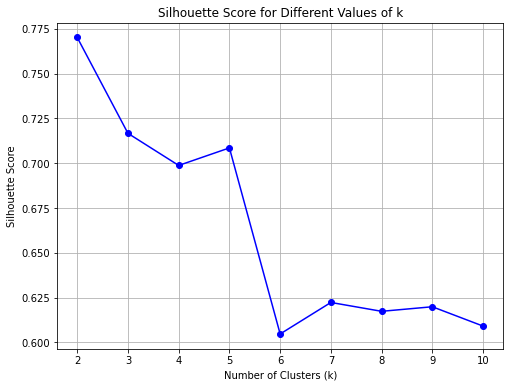

In [18]:
# Memilih kolom yang akan digunakan
data = df[['Avg Credit Limit', 'Total Kartu Kredit', 'Total Visit Bank', 'Total Visit Online', 'Total Calls Made']]

# Inisialisasi daftar untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Menghitung Silhouette Score untuk nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k}, Silhouette Score = {silhouette_avg}")

# Menampilkan hasil
k_values = range(2, 11)
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [19]:
# Memilih kolom yang akan digunakan
data = df[['Avg Credit Limit', 'Total Kartu Kredit', 'Total Visit Bank', 'Total Visit Online', 'Total Calls Made']]

# Inisialisasi daftar untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Menghitung Davies-Bouldin Index untuk nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    dbi = davies_bouldin_score(data, labels)
    dbi_scores.append(dbi)
    print(f"For k = {k}, Davies-Bouldin Index = {dbi}")

# Menampilkan hasil
k_values = range(2, 11)
print("Davies-Bouldin Index Scores:")
print(dbi_scores)


For k = 2, Davies-Bouldin Index = 0.4195698871006938
For k = 3, Davies-Bouldin Index = 0.3931264269494812
For k = 4, Davies-Bouldin Index = 0.4565495281304989
For k = 5, Davies-Bouldin Index = 0.43373357516892985
For k = 6, Davies-Bouldin Index = 0.4631359963583746
For k = 7, Davies-Bouldin Index = 0.4569073600459975
For k = 8, Davies-Bouldin Index = 0.4988484754963855
For k = 9, Davies-Bouldin Index = 0.48327577130643423
For k = 10, Davies-Bouldin Index = 0.4848100116361483
Davies-Bouldin Index Scores:
[0.4195698871006938, 0.3931264269494812, 0.4565495281304989, 0.43373357516892985, 0.4631359963583746, 0.4569073600459975, 0.4988484754963855, 0.48327577130643423, 0.4848100116361483]


In [43]:
from sklearn.preprocessing import MinMaxScaler #Importing MinMaxScaler
scaler= MinMaxScaler() #Initialising the instance of the scaler
scaled_features = scaler.fit_transform(X) #Storing the scaled version of features in scaled_features

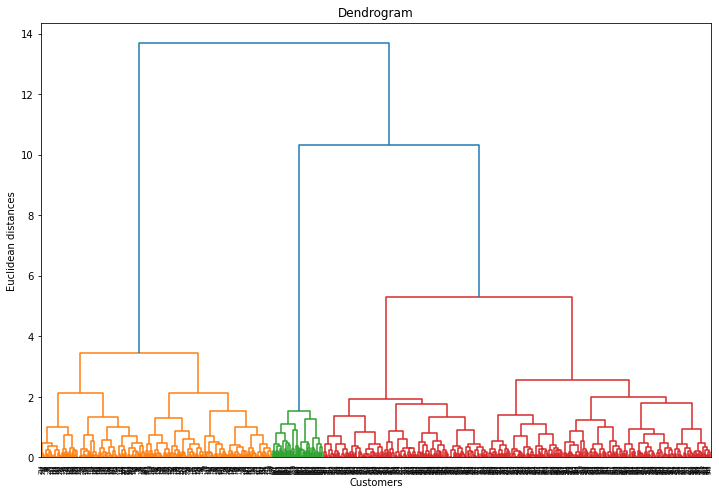

In [44]:
import scipy.cluster.hierarchy as sch #import the library
plt.figure(figsize=(12,8)) #Canvas size
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [21]:
# Memilih kolom yang akan digunakan
data = df[['Avg Credit Limit', 'Total Kartu Kredit', 'Total Visit Bank', 'Total Visit Online', 'Total Calls Made']]

# Inisialisasi daftar untuk menyimpan nilai Calinski-Harabasz Index
chi_scores = []

# Menghitung Calinski-Harabasz Index untuk nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    chi = calinski_harabasz_score(data, labels)
    chi_scores.append(chi)
    print(f"For k = {k}, Calinski-Harabasz Index = {chi}")

# Menampilkan hasil
k_values = range(2, 11)
print("Calinski-Harabasz Index Scores:")
print(chi_scores)


For k = 2, Calinski-Harabasz Index = 1285.4077210062537
For k = 3, Calinski-Harabasz Index = 2938.568521901851
For k = 4, Calinski-Harabasz Index = 3627.1991953683073
For k = 5, Calinski-Harabasz Index = 4782.623044229097
For k = 6, Calinski-Harabasz Index = 5012.110887988501
For k = 7, Calinski-Harabasz Index = 5690.95570221129
For k = 8, Calinski-Harabasz Index = 6891.67419796757
For k = 9, Calinski-Harabasz Index = 7810.553938327074
For k = 10, Calinski-Harabasz Index = 8458.312539940493
Calinski-Harabasz Index Scores:
[1285.4077210062537, 2938.568521901851, 3627.1991953683073, 4782.623044229097, 5012.110887988501, 5690.95570221129, 6891.67419796757, 7810.553938327074, 8458.312539940493]


In [34]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [35]:
print(y_kmeans)

[2 2 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2
 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2
 0 2 0 0 2 2 2 2 2 2 2 2 

In [36]:
Segment = pd.DataFrame(y_kmeans,columns=['Segment']) #Converting the cluster to data frame
Segment

,Segment
0,2
1,2
2,2
3,0
4,2
...,...
655,2
656,2
657,1
658,1


In [39]:
data=df.copy()
data=pd.concat([data,Segment],axis=1)

In [40]:
features = ['Avg Credit Limit', 'Total Kartu Kredit', 'Total Visit Bank', 'Total Visit Online', 'Total Calls Made']

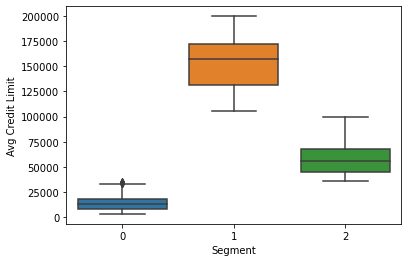

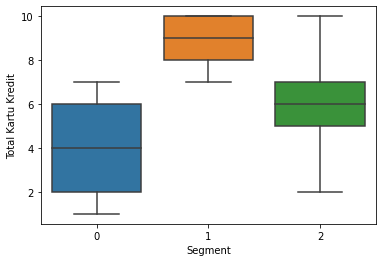

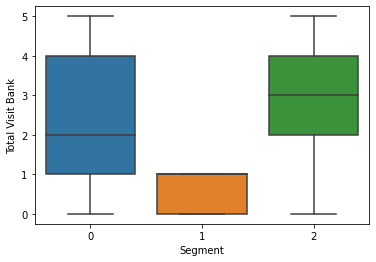

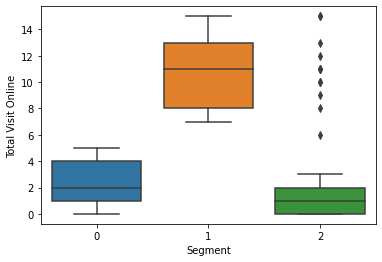

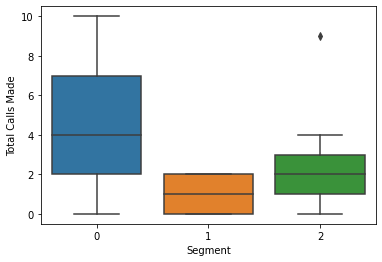

In [41]:
for feature in features:  #Loop to plot boxplot of each cluster
    sns.boxplot(x='Segment',y=feature,data=data)
    plt.show()